In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_excel('C:/Users/Mgama/Ai_Amit_Diploma/Learning_Amit/Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [86]:
data.drop(['CustomerID','Churn Label','Count','Country','State','Zip Code','Lat Long','City'],
          axis=1, inplace=True, errors='ignore')

In [87]:
le = LabelEncoder()
if 'Contract' in data.columns:
    data['Contract'] = le.fit_transform(data['Contract'])

# معالجة القيم المفقودة
if 'Churn Reason' in data.columns:
    data['Churn Reason'].fillna("not leave", inplace=True)

if 'Total Charges' in data.columns:
    data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
    data['Total Charges'].fillna(data['Total Charges'].mean(), inplace=True)

# One-hot encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,Latitude,Longitude,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,...,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Churn Reason_not leave
0,33.964131,-118.272783,2,0,53.85,108.15,1,86,3239,True,...,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,0,70.70,151.65,1,67,2701,False,...,False,False,True,False,False,False,False,False,False,False
2,34.048013,-118.293953,8,0,99.65,820.50,1,86,5372,False,...,False,False,True,False,False,False,False,False,False,False
3,34.062125,-118.315709,28,0,104.80,3046.05,1,84,5003,False,...,False,False,True,False,False,False,False,False,False,False
4,34.039224,-118.266293,49,0,103.70,5036.30,1,89,5340,True,...,False,False,False,False,False,False,False,False,False,False


In [88]:
X = data.drop(['Churn Value'], axis=1).values
y = data['Churn Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# تعريف الـ Optimizers مع learning rates محسّنة
optimizers = {
    'SGD': SGD(learning_rate=0.001),
    'Momentum': SGD(learning_rate=0.001, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.0001),
    'Adam': Adam(learning_rate=0.0001),
    'Adagrad': Adagrad(learning_rate=0.001),
    'Adadelta': Adadelta(learning_rate=0.1),
    'Adamax': Adamax(learning_rate=0.0001),
    'Nadam': Nadam(learning_rate=0.0001),
    'Ftrl': Ftrl(learning_rate=0.001)
}

In [108]:
results = {}
history_dict = {}
training_time = {}

In [109]:
for idx, (name, optimizer) in enumerate(optimizers.items(), 1):
    print(f"[{idx}/{len(optimizers)}] Training with {name}...", end=' ')
    
    start_time = time.time()
    
    model = create_model()
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=0)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)
    
    results[name] = {
        'loss': loss, 
        'accuracy': accuracy,
        'training_time': elapsed_time,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'predictions': y_pred
    }
    history_dict[name] = history.history
    training_time[name] = elapsed_time
    
    print(f"Done! Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Time: {elapsed_time:.2f}s")

print("\nTraining completed!")

[1/9] Training with SGD... Done! Loss: 0.0081, Accuracy: 0.9979, Time: 33.41s
[2/9] Training with Momentum... Done! Loss: 0.0004, Accuracy: 1.0000, Time: 35.38s
[3/9] Training with RMSprop... Done! Loss: 0.0001, Accuracy: 1.0000, Time: 34.85s
[4/9] Training with Adam... Done! Loss: 0.0000, Accuracy: 1.0000, Time: 37.05s
[5/9] Training with Adagrad... Done! Loss: 0.0103, Accuracy: 0.9986, Time: 34.30s
[6/9] Training with Adadelta... Done! Loss: 0.0001, Accuracy: 1.0000, Time: 36.37s
[7/9] Training with Adamax... Done! Loss: 0.0002, Accuracy: 1.0000, Time: 36.38s
[8/9] Training with Nadam... Done! Loss: 0.0000, Accuracy: 1.0000, Time: 33.57s
[9/9] Training with Ftrl... Done! Loss: 0.3840, Accuracy: 0.7161, Time: 30.24s

Training completed!


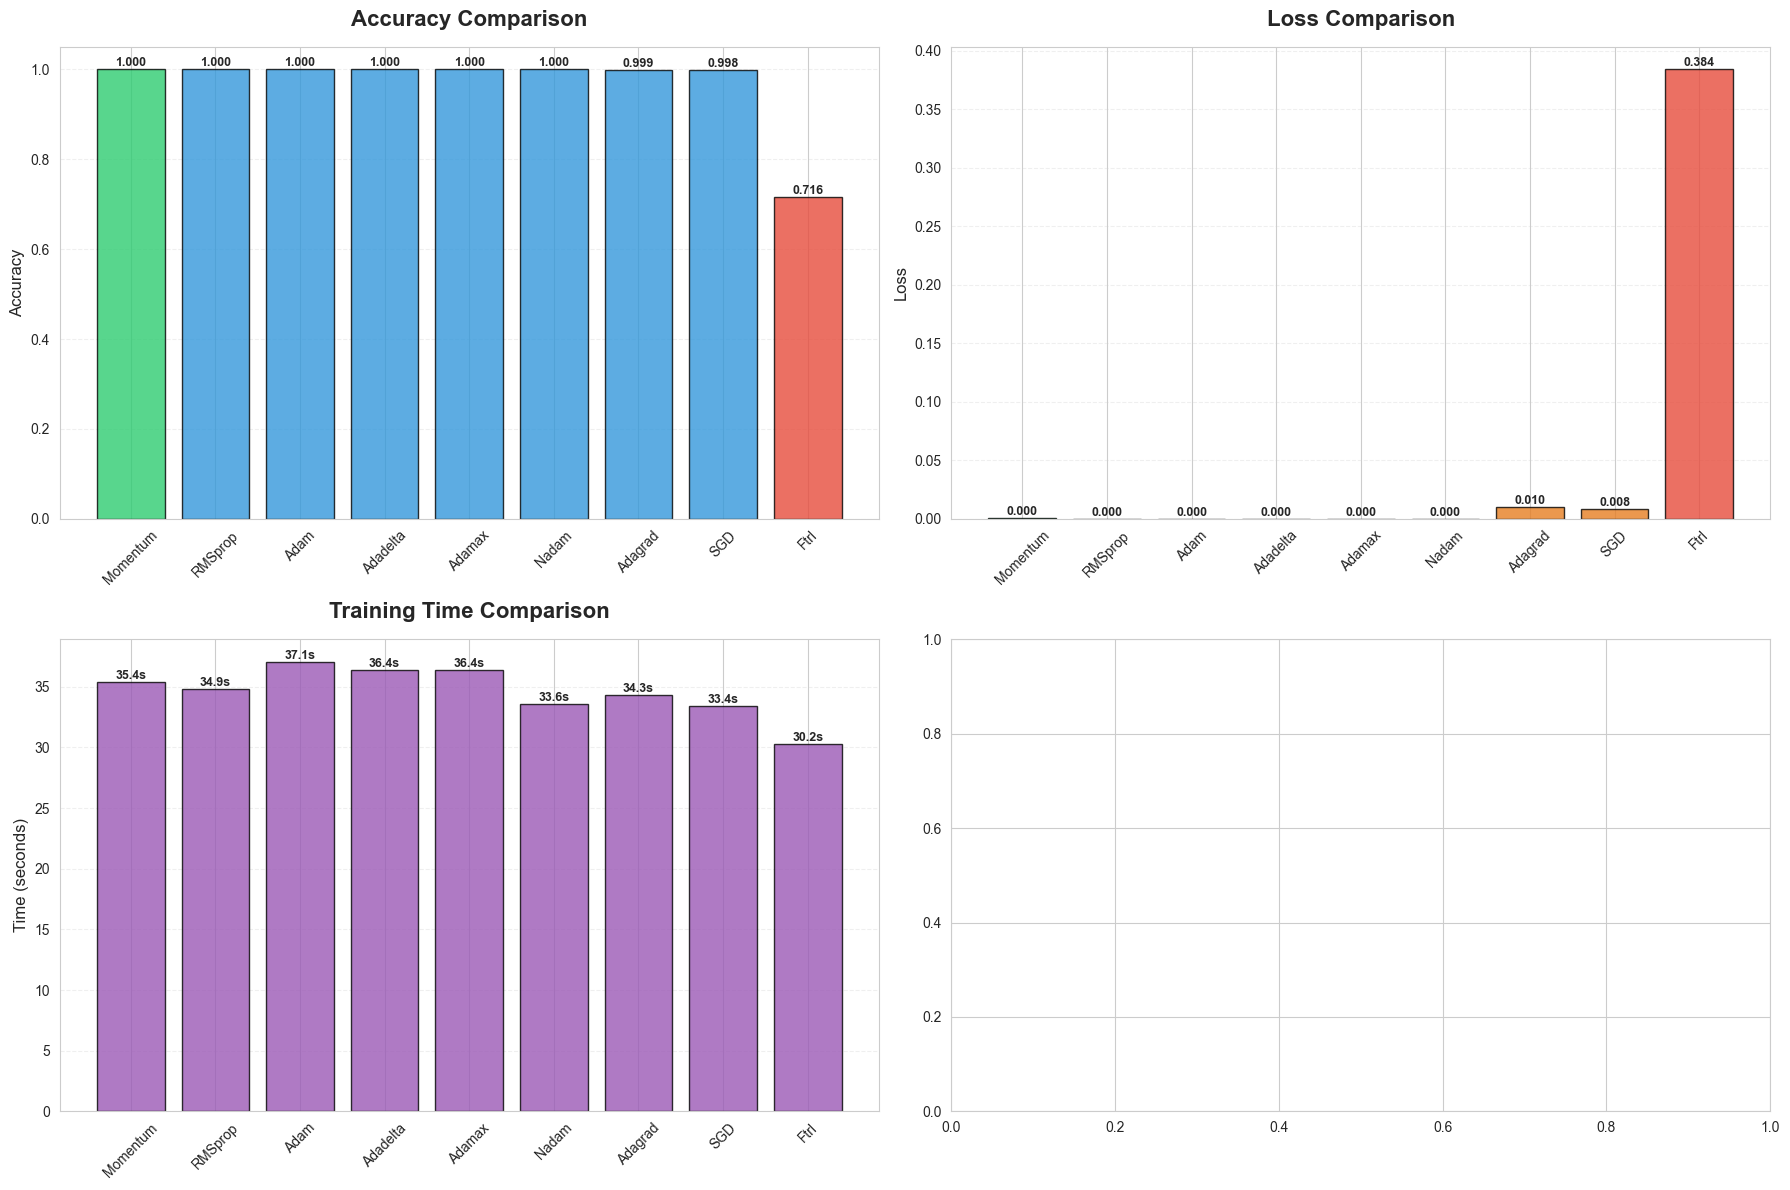

In [124]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

# 1. Accuracy and Loss Comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Accuracy bar chart
ax1 = axes[0, 0]
colors = ['#2ecc71' if i == 0 else '#e74c3c' if i == len(results_df)-1 else '#3498db' 
          for i in range(len(results_df))]
bars = ax1.bar(results_df.index, results_df['accuracy'], color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Accuracy Comparison', fontsize=16, fontweight='bold', pad=15)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Loss bar chart
ax2 = axes[0, 1]
colors_loss = ['#2ecc71' if i == 0 else '#e74c3c' if i == len(results_df)-1 else '#e67e22' 
               for i in range(len(results_df))]
bars = ax2.bar(results_df.index, results_df['loss'], color=colors_loss, alpha=0.8, edgecolor='black')
ax2.set_title('Loss Comparison', fontsize=16, fontweight='bold', pad=15)
ax2.set_ylabel('Loss', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Training time comparison
ax3 = axes[1, 0]
bars = ax3.bar(results_df.index, results_df['training_time'], color='#9b59b6', alpha=0.8, edgecolor='black')
ax3.set_title('Training Time Comparison', fontsize=16, fontweight='bold', pad=15)
ax3.set_ylabel('Time (seconds)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}s', ha='center', va='bottom', fontsize=9, fontweight='bold')



plt.tight_layout()
plt.savefig('optimizer_comparison_overview.png', dpi=300, bbox_inches='tight')
plt.show()

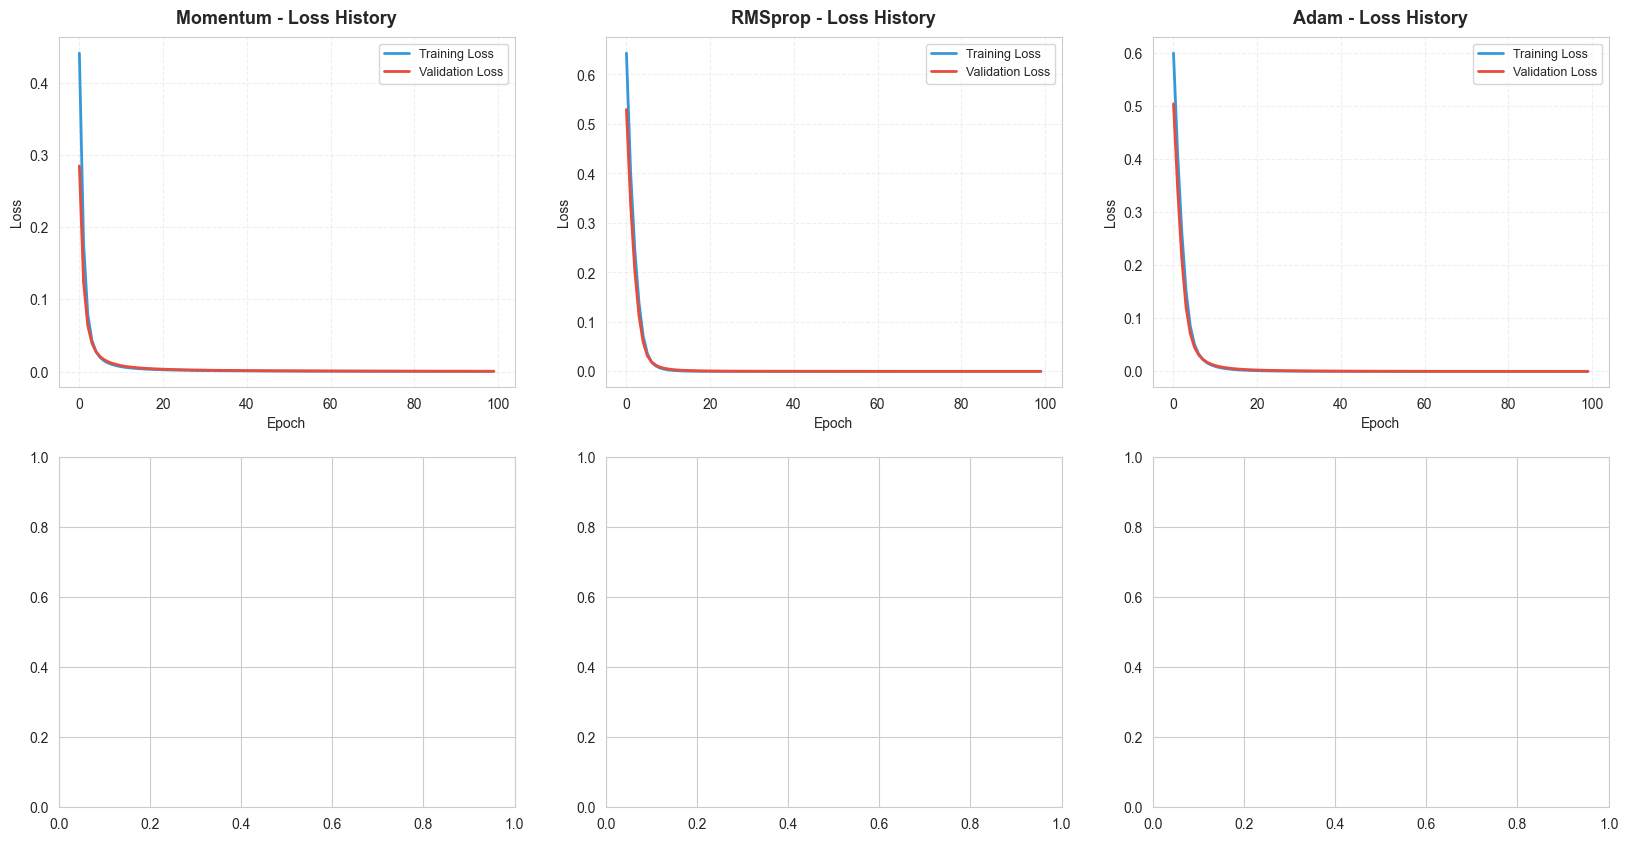

In [115]:
top_3 = results_df.head(3).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Loss history
for i, opt in enumerate(top_3):
    ax = axes[0, i]
    ax.plot(history_dict[opt]['loss'], label='Training Loss', linewidth=2, color='#3498db')
    ax.plot(history_dict[opt]['val_loss'], label='Validation Loss', linewidth=2, color='#e74c3c')
    ax.set_title(f'{opt} - Loss History', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Epoch', fontsize=10)
    ax.set_ylabel('Loss', fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(alpha=0.3, linestyle='--')